# Code Challenge XIBIX

## Try to read data from Json

In [2]:
class Mesh(object):
    def __init__(self):
        self.nodes = {}
        self.values = {}
        self.elements = {}
        
    def get_nodes(self):
        return self.nodes
    
    def get_values(self):
        return self.values
    
    def get_elements(self):
        return self.elements


## Function to read data from Json

In [8]:
def read_json_mesh_file(json_file):
    """reads json file and returns dictionaries of nodes, elements and values
    
    Args:
        json_file: file containing json data
        
    Returns:
        mesh: Mesh object
    """
    import json
 
    # Opening JSON file
    f = open(json_file)

    # returns JSON object as
    # a dictionary
    data = json.load(f)

    mesh = Mesh()
    mesh.nodes = data['nodes']
    mesh.elements = data['elements']
    mesh.values = data['values']

    # Closing file
    f.close()
    
    return mesh

## Read data

In [8]:
# json input

# nodes:
# {"id": 0,"x": 0.0, "y": 0.0}
# {"id": 1,"x": 0.0, "y": 1.0}
# {"id": 12,"x": 1.0,"y": 1.0}

# elements:"id": 0, "nodes": [0,1,12]

# "values": [{ "element_id": 0, "value": 0.15154957113761364 }

In [4]:
# import libraries for visualization

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [9]:
# get first 10 elements
mesh = read_json_mesh_file('mesh.json')
elements = mesh.get_elements()
elements[:10]

[{'id': 0, 'nodes': [0, 1, 12]},
 {'id': 1, 'nodes': [0, 11, 12]},
 {'id': 2, 'nodes': [1, 2, 13]},
 {'id': 3, 'nodes': [1, 12, 13]},
 {'id': 4, 'nodes': [2, 3, 14]},
 {'id': 5, 'nodes': [2, 13, 14]},
 {'id': 6, 'nodes': [3, 4, 15]},
 {'id': 7, 'nodes': [3, 14, 15]},
 {'id': 8, 'nodes': [4, 5, 16]},
 {'id': 9, 'nodes': [4, 15, 16]}]

In [10]:
# get first 5 nodes
nodes = mesh.get_nodes()
nodes[:5]

[{'id': 0, 'x': 0.0, 'y': 0.0},
 {'id': 1, 'x': 0.0, 'y': 1.0},
 {'id': 2, 'x': 0.0, 'y': 2.0},
 {'id': 3, 'x': 0.0, 'y': 3.0},
 {'id': 4, 'x': 0.0, 'y': 4.0}]

In [11]:
# get first 5 values
values = mesh.get_values()
values[:5]

[{'element_id': 0, 'value': 0.15154957113761364},
 {'element_id': 1, 'value': 0.4320398994069125},
 {'element_id': 2, 'value': -0.11672516279133821},
 {'element_id': 3, 'value': 0.034824408346275426},
 {'element_id': 4, 'value': -0.27768332035560167}]

## Draw triangle outlines

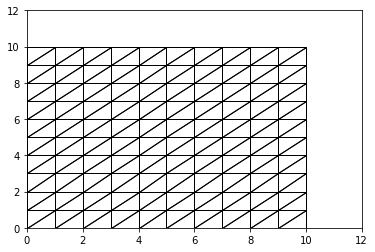

In [12]:
# read input file
mesh = read_json_mesh_file('mesh.json')

# get elements
elements = mesh.get_elements()
# get nodes
nodes = mesh.get_nodes()

# for each element get all nodes and their x,y coordinates
for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
        
    # draw polygon from coordinates
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, fill=None)
    ax = plt.gca()
    ax.add_patch(p)
    
    # set figure limits
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

plt.show()

## Draw triangles with color map based on element value
local maxima are blue; local minima are red

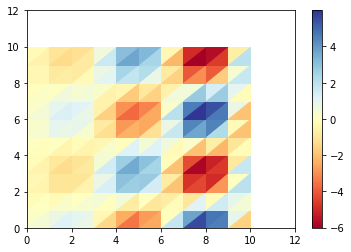

In [13]:
# read input file
mesh = read_json_mesh_file('mesh.json')

# get elements, nodes and values
elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig= plt.figure()
ax= fig.add_subplot(111)

# create color map
cmap=plt.cm.RdYlBu
# normalize color map based on min and max in all values
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

# for each element get nodes and for each node get x,y coordinates
for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    # normalize value based on color map
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # draw polygon based on coordinates and fill with normalized color value
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    # set figure size
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

# draw colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

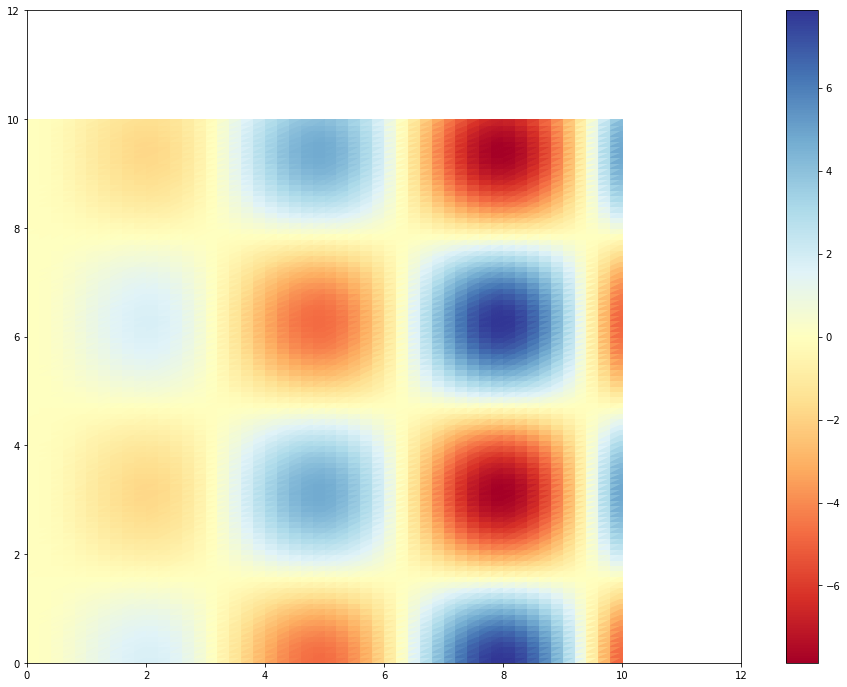

In [14]:
# same as above, but with bigger json input file
mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

In [15]:
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    """reads two float values and checks if they are close
            to each other to a certain precision
        Args:
            a, b: float values
        Returns:
            True or False
    """
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

## Get view spots

In [75]:
#%%timeit

# 'mesh.json': 30.1 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 'mesh_x_sin_cos_10000.json': 1min 1s ± 3.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
# 'mesh_x_sin_cos_20000.json': 4min 16s ± 3.06 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

# input data
mesh = read_json_mesh_file('mesh.json')
# mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')
#mesh = read_json_mesh_file('mesh_x_sin_cos_20000.json')

# hard-coded N = number of view spots
N = 15

# get elements, nodes and values
elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

# save identified view spots in array of dicts
spots = []

# for each element
for element in elements:
    
    # get element_id
    id = element['id']
    
    # get nodes from element
    element_nodes = element['nodes']
    
    # for each of 3 nodes find neigbors = element IDs; append all in one list list_all_new
    list_all_new = []
    for en in element_nodes:
        list_new = [ ele['id'] for ele in elements if ( en in ele['nodes'])]
        list_all_new=list(set().union(list_all_new,list_new))
    
    # element_id = id is also found, so remove that one
    list_all_new.remove(id)
    #print(list_all_new)
    
    # get values for element IDs in second list
    values_new = [ val['value'] for  val in values if (val['element_id'] in list_all_new)]
    #print(values_new)
    
    # get value for element_id = id
    value_node =[ val['value'] for  val in values if (val['element_id'] == id)][0]
    
    # remember element and neighbors in list only if all(value_node > a for a in values_new) == True
    #if (all(value_node > a for a in values_new)):
    #    print(id, ' ', value_node, values_new)
    
    # compare value in element (value_node) to max of all neigbor values (values_new)
    if (value_node > max(values_new)):
        # setup output view spot dict
        spot = {'element_id': id, 'value': value_node}
        # append view spot to output list
        spots.append(spot)
        
        # if N spots are already found for-loop is stopped
        if (len(spots) == N):
            break
    
    # identify plateau values; neighbor have same values
    else :
        if (isclose(value_node, max(values_new))):
            print('2: ', id, ' ', value_node)

# sort spots based on their values in descending order
sorted_spots = sorted(spots, key=lambda d: d['value'], reverse=True) 
print(sorted_spots)

[{'element_id': 153, 'value': 5.99412916855438}, {'element_id': 141, 'value': 5.59673083328692}, {'element_id': 99, 'value': 3.7165791791790643}, {'element_id': 87, 'value': 3.6258426752667208}, {'element_id': 199, 'value': 2.047341538506613}, {'element_id': 185, 'value': 2.0353928618660895}, {'element_id': 33, 'value': 1.3083863128423896}, {'element_id': 21, 'value': 1.2142189437756745}, {'element_id': 18, 'value': -0.23535144863207666}]


In [61]:
#values_new = [ val['value'] for  val in values if (val['element_id'] in list_all_new)]

list_all_new = [36, 38, 39, 14, 17, 18, 19]

values_new = [ val['value'] for  val in values if (val['element_id'] in list_all_new)]
print(values_new)

[-0.04081135224617209, -0.29637457849829735, -0.23535144863207666, -0.49091467488420193, -0.8487001802547948, -0.9995583964254742, -1.316532549549895]


## Draw elements with color map and local maxima with black triangles

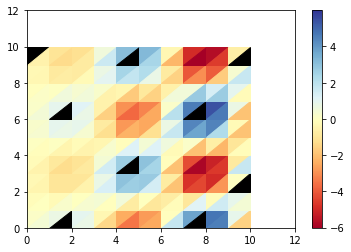

In [90]:
# read small test file
mesh = read_json_mesh_file('mesh.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig= plt.figure()
ax= fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima = special in black
    special = [18, 21, 33, 87, 99, 141, 153, 185, 199]
    if (element['id'] in special):
        color = 'black'
    
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

    
#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

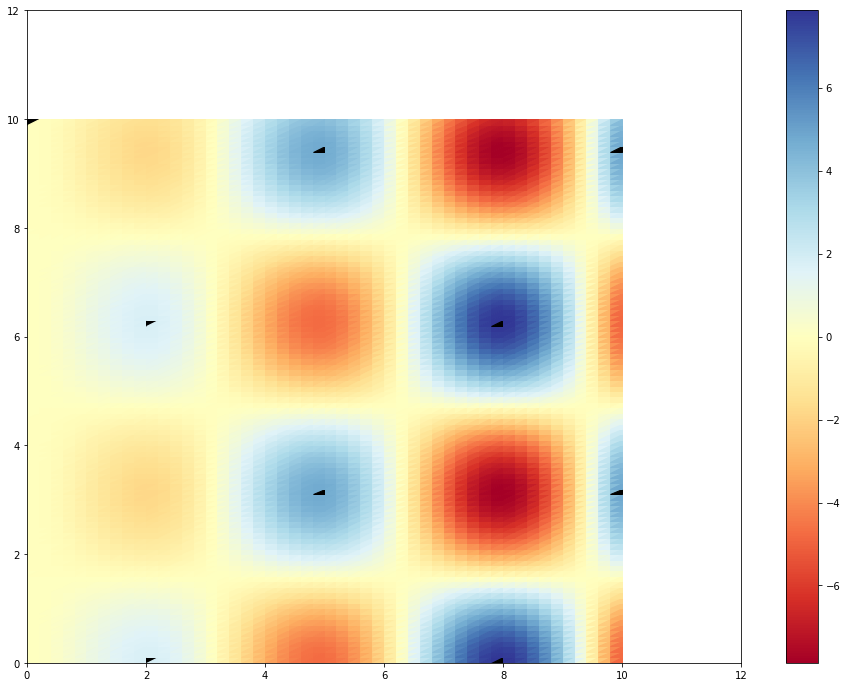

In [92]:
# bigger file
mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima black
    # special = [198, 2000, 2124, 4863, 4989, 7801, 7925, 7927, 9863, 9989]
    special = [7801, 7925, 9863, 9989, 4863, 4989, 2124, 2000, 198]
    if (element['id'] in special):
        color = 'black'
    
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

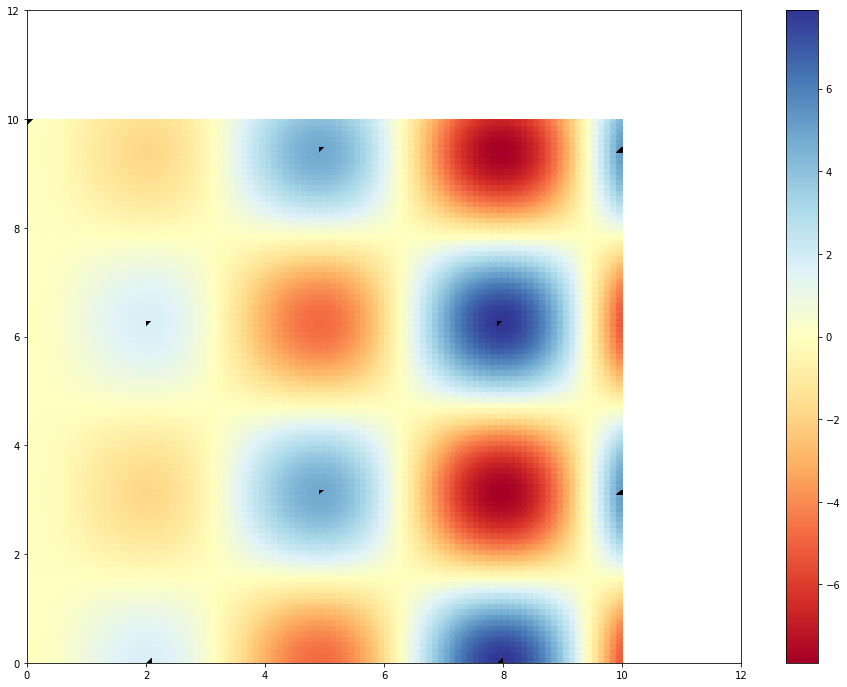

In [94]:
# file with 20000 elements
mesh = read_json_mesh_file('mesh_x_sin_cos_20000.json')

elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    # color maxima black
    special = [15801, 15924, 19863, 19989, 9862, 9988, 4124, 4001, 198]
    if (element['id'] in special):
        color = 'black'
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

In [98]:
def combine_lists_and_remove_duplicates(list1, list2):
    newlist = list1 + list(set(list2) - set(list1))
    return newlist

In [99]:
#%%timeit

# 'mesh.json': 
# 'mesh_x_sin_cos_10000.json': 
# 'mesh_x_sin_cos_20000.json':

# input data
mesh = read_json_mesh_file('mesh.json') # 8.88 ms ± 579 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
#mesh = read_json_mesh_file('mesh_x_sin_cos_10000.json') # 14.1 s ± 752 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#mesh = read_json_mesh_file('mesh_x_sin_cos_20000.json') # 1min 1s ± 2.85 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

# hard-coded N = number of view spots
N = 15

# get elements, nodes and values
elements = mesh.get_elements()
nodes = mesh.get_nodes()
values = mesh.get_values()

# save identified view spots in array of dicts
spots = []

# list of elementids not to be seen again
donotlookAt = []

# for each element
for element in elements:
    
    # get element_id
    id = element['id']
    
    if (id in donotlookAt):
        continue
    
    # get nodes from element
    element_nodes = element['nodes']
    
    # for each of 3 nodes find neigbors = element IDs; append all in one list list_all_new
    list_all_new = []
    for en in element_nodes:
        list_new = [ ele['id'] for ele in elements if ( en in ele['nodes'])]
        list_all_new=list(set().union(list_all_new,list_new))
    
    # element_id = id is also found, so remove that one
    list_all_new.remove(id)
    
    # get values for element IDs in second list
    values_new = [ {'element_id': val['element_id'], 'value' : val['value']} 
                  for  val in values if (val['element_id'] in list_all_new)]
    
    # get value for element_id = id
    value_node =[ val['value'] for  val in values if (val['element_id'] == id)][0]
    
    # compare value in element (value_node) to max of all neigbor values (values_new)
    max_value_new = max([d['value'] for d in values_new])
    
    if (value_node > max_value_new):
        # setup output view spot dict
        spot = {'element_id': id, 'value': value_node}
        # append view spot to output list
        spots.append(spot)
        
        # all element ids cannot be maxima, so append to donotlookAt
        donotlookAt = combine_lists_and_remove_duplicates(donotlookAt, list_all_new)
        
        # if N spots are already found for-loop is stopped
        if (len(spots) == N):
            break
            
    # put all elements smaller than max to donotlookAt
    else:
        # get index of max value
        max_value_new_id = [ val['element_id'] for  val in values if (val['value'] == max_value_new)][0]
        # remove index of max value from list_all_new
        #print(max_value_new_id, list_all_new)
        list_all_new.remove(max_value_new_id)
        # append all elements smaller than max to donotlookAt
        donotlookAt = combine_lists_and_remove_duplicates(donotlookAt, list_all_new)
        
    # identify plateau values; neighbor have same values
    #else :
    #    if (isclose(value_node, max(values_new))):
    #        print('2: ', id, ' ', value_node)   
    
# sort spots based on their values in descending order
sorted_spots = sorted(spots, key=lambda d: d['value'], reverse=True) 
print(sorted_spots)

# testfile
#special = [21, 33, 87, 99, 141, 153, 185]

# 10000
# special = [7801, 7925, 9863, 9989, 4863, 4989, 2124, 2000, 198]

# 20000
# special = [15801, 15924, 19863, 19989, 9862, 9988, 4124, 4001, 198]

[{'element_id': 153, 'value': 5.99412916855438}, {'element_id': 141, 'value': 5.59673083328692}, {'element_id': 99, 'value': 3.7165791791790643}, {'element_id': 87, 'value': 3.6258426752667208}, {'element_id': 185, 'value': 2.0353928618660895}, {'element_id': 33, 'value': 1.3083863128423896}, {'element_id': 21, 'value': 1.2142189437756745}]
